<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Agosto_10_(_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pathlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/Data 2'
data_dir = pathlib.Path(data_dir)

In [4]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32,
    label_mode="int"  # This is important for SparseCategoricalCrossentropy loss
)

Found 18 files belonging to 4 classes.
Using 17 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=128,
    label_mode="int"
)

class_names = train_ds.class_names
print(class_names)

Found 18 files belonging to 4 classes.
Using 5 files for validation.
['Control', 'Tat', 'TatcART', 'cART']


In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names))
])

In [9]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_ds, validation_data=val_ds, epochs=200, callbacks=[early_stopping])

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.8376 - accuracy: 0.3529 - val_loss: 1.2010 - val_accuracy: 0.6000
Epoch 2/200
1/1 [==============================] - 3s 3s/step - loss: 1.3555 - accuracy: 0.2941 - val_loss: 1.3887 - val_accuracy: 0.2000
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 1.1934 - accuracy: 0.4706 - val_loss: 1.4130 - val_accuracy: 0.2000
Epoch 4/200
1/1 [==============================] - 3s 3s/step - loss: 1.4110 - accuracy: 0.3529 - val_loss: 1.3971 - val_accuracy: 0.2000
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 1.0941 - accuracy: 0.6471 - val_loss: 1.2467 - val_accuracy: 0.2000
Epoch 6/200
1/1 [==============================] - 4s 4s/step - loss: 1.2104 - accuracy: 0.3529 - val_loss: 1.0865 - val_accuracy: 0.6000
Epoch 7/200
1/1 [==============================] - 4s 4s/step - loss: 1.2255 - accuracy: 0.5882 - val_loss: 1.0733 - val_accuracy: 0.6000
Epoch 8/200
1/1 [=================

In [21]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

In [23]:
# Get the final accuracy values (last epoch)
final_train_accuracy = y_acc[-1]
final_val_accuracy = y_vacc[-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

Final Training Accuracy: 0.7647
Final Validation Accuracy: 0.4000


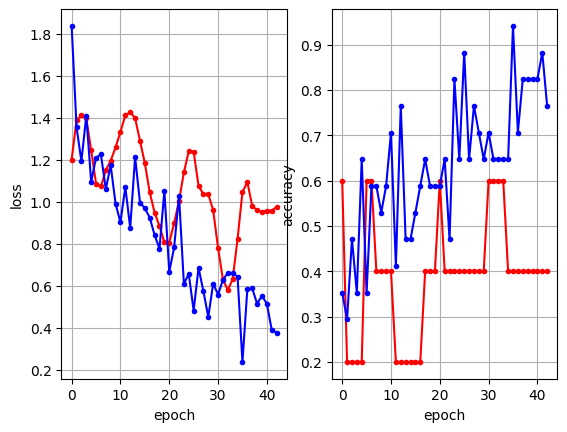

In [22]:
fig, (ax1, ax2) = plt.subplots (1, 2)
ax1.plot(np.arange (len (y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange (len (y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange (len (y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange (len (y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()

In [26]:
 #Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(val_ds)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict classes for validation set
val_predictions = model.predict(val_ds)
val_predicted_classes = np.argmax(val_predictions, axis=-1)

# Get true classes for validation set
val_true_classes = val_ds.map(lambda x, y: y).unbatch().as_numpy_iterator()
val_true_classes = np.array(list(val_true_classes))

1/1 [==============================] - 1s 575ms/step - loss: 0.5801 - accuracy: 0.6000
Validation Loss: 0.5801
Validation Accuracy: 0.6000
1/1 [==============================] - 0s 281ms/step
